# COLLECTING DATA

In [87]:
#CD IMPORTING MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import *

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import jaccard_similarity_score,accuracy_score,confusion_matrix, classification_report,log_loss

In [88]:
#CD reading data into pandas
data=pd.read_excel('LTdata.xls')
data.head(10)

,age,churn
0,2,0
1,3,0
2,4,0
3,5,0
4,6,0
5,7,0
6,8,0
7,9,0
8,10,0
9,11,0


In [89]:
#CD KNOWING SHAPE OF DATA
data.shape

(599, 2)

# ANALYSING THE DATA

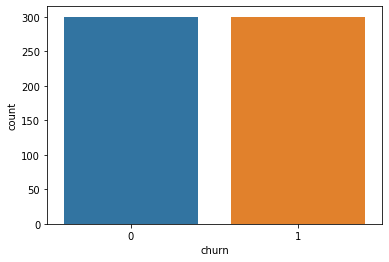

In [90]:
#ATD seaborn countplot
sb.countplot(x='churn',data=data)


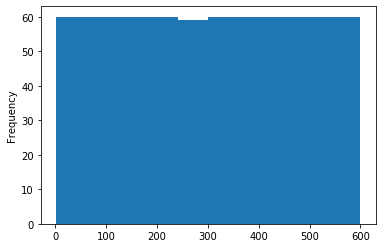

In [91]:
#ATD DRAWING HISTOGRAM
data['age'].plot.hist()

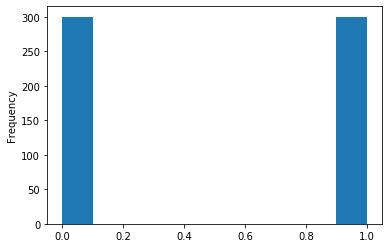

In [92]:
#ATD HISTOGRAM
data['churn'].plot.hist()

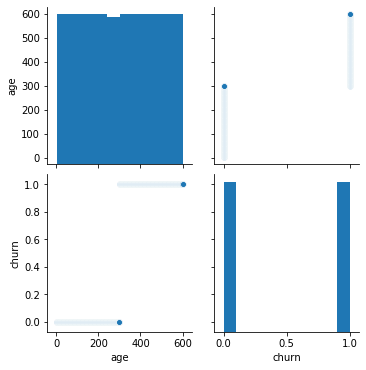

In [93]:
#ATD seaborn pairplot
sb.pairplot(data)

In [94]:
#ATD GETTING THE DATA INFO
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     599 non-null    int64
 1   churn   599 non-null    int64
dtypes: int64(2)
memory usage: 9.5 KB


# DATA WRANGLING

In [95]:
# Not Required Here


# TRAIN AND TEST THE MODEL

In [96]:
# Required x and y in matrix form
x=np.asanyarray(data[['age']])
y=np.asanyarray(data[['churn']])


In [97]:
# Normalizing the data
x = preprocessing.StandardScaler().fit(x).transform(x)


In [98]:
# dividing the data to train and test set
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)



In [99]:
# OPTIMIZING THE DATA
lr=linear_model.LogisticRegression(C=0.01, solver='liblinear')
lr.fit(x_train,y_train)
print(lr.intercept_,lr.coef_)

[-0.0272484] [[1.02164992]]


C:\python_spy\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
# Predicting the data
predict=lr.predict(x_test)


In [102]:
predict_prob=lr.predict_proba(x_test)

# EVALUATION

In [103]:
#jaccard index method
jaccard_similarity_score(y_test, predict)

C:\python_spy\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.975

In [104]:
# Confusion matrix analysis

cm=confusion_matrix(y_test,predict)
print(cm)


[[52  0]
 [ 3 65]]


In [105]:
#Accuracy evaluation
accuracy_score(y_test,predict)

0.975

In [106]:
# Prcision and F-1 Value
print (classification_report(y_test, predict))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        52
           1       1.00      0.96      0.98        68

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [107]:
# Log-Loss
log_loss(y_test, predict_prob)

0.3969643392696934

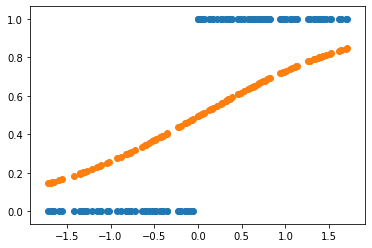

In [108]:
# PLOTING THE HYPOTHESIS { PROBABILITY CURVE}
plt.scatter(x_test,y_test)
plt.scatter(x_test,predict_prob[:,1])

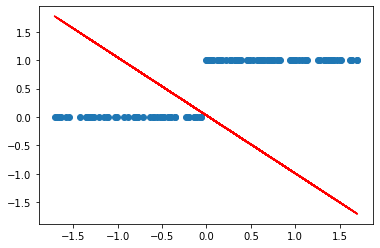

In [113]:
#PLOTING THE  DECISION BOUNDARY
plt.scatter(x_test,y_test)
z=lr.intercept_+x_test[:,0]*lr.coef_[0]
plt.plot(x_test,-1*z,'-r')